# Modelo de colas G/G/1

In [1]:
import random
import math
import matplotlib.pyplot as plt

In [2]:
def get_random_number():
    """
    Genera una variable aleatoria
    con una distribución uniforme.
    """
    return random.random()

def get_exponential(lambda_parameter):
    """
    Genera una variable aleatoria
    con una distribución exponencial.
    """
    random_number = get_random_number()
    value = - (math.log(1 - random_number) / float(lambda_parameter))
    return value

def get_normal():
    """
    Genera una variable aleatoria
    con una distribución normal
    """
    random_number = get_random_number()
    square_root = math.sqrt(-2 * math.log1p(random_number - 1))
    sin = math.sin(2 * math.pi * random_number)
    value = square_root * sin
    if(value < 0):
        value = 0
    return value

In [3]:
def arrival(actual_simulated_time):
    """
    Recibe a un nuevo cliente.
    """
    global time
    global number_of_clients
    global number_of_arrivals
    global arrivals
    global lambda_parameter
    global max_service_time
    global main_times
    global clients, times
    
    
    time = actual_simulated_time
    
    clients.append(number_of_clients)
    times.append(time)
    
    number_of_clients += 1
    number_of_arrivals += 1
    arrivals.append(time)
    
    clients.append(number_of_clients)
    times.append(time)
    
    new_simulated_time = get_exponential(lambda_parameter)
    if(time + new_simulated_time < max_service_time):
        main_times['arrival_times'] = time + new_simulated_time
    if(number_of_clients == 1):
        simulated_service_time = get_normal()
        main_times['departure_times'] = time + simulated_service_time
        services_time.append(simulated_service_time)
        

def server(actual_simulated_time):
    """
    Recibe como parametro el tiempo en el que se realizará
    la atención al cliente y posterior a ello lo atiende
    siempre y cuando hayan clientes por atender.
    """
    global time
    global number_of_clients
    global number_of_departures
    global departures
    global main_times
    global clients, times

    
    time = actual_simulated_time
    
    clients.append(number_of_clients)
    times.append(time)
    
    number_of_clients -= 1
    number_of_departures += 1
    departures.append(time)
    
    clients.append(number_of_clients)
    times.append(time)
    
    if(number_of_clients > 0):
        simulated_service_time = get_normal()
        main_times['departure_times'] = time + simulated_service_time
        services_time.append(simulated_service_time)

In [4]:
time = 0 
number_of_clients = 0
number_of_arrivals = 0
number_of_departures = 0
max_service_time = 10
simulation_time_after_last_client = 0
actual_simulated_time = 0

mean_system_time = 0
mean_queue_time = 0

departures = []
arrivals = []
services_time = []

clients = [0] # Eje Y
times = [0]   # Eje X

M = 9999999999 #big big number

main_times = {
    'arrival_times': M,
    'departure_times': M
}

lambda_parameter = 3

In [5]:
actual_simulated_time = get_exponential(lambda_parameter)

if actual_simulated_time > max_service_time:
    simulation_time_after_last_client = 0
    mean_system_time = 0
    mean_queue_time = 0
else:
    arrival(actual_simulated_time)
    
    while(main_times['arrival_times'] != M or main_times['departure_times'] != M):
        if(main_times['arrival_times'] < main_times['departure_times']):
            new_simulated_time = main_times['arrival_times']
            main_times['arrival_times'] = M
            arrival(new_simulated_time)
        if(main_times['departure_times'] < main_times['arrival_times']):
            new_simulated_time = main_times['departure_times']
            main_times['departure_times'] = M
            server(new_simulated_time)
    
    simulation_time_after_last_client = max(0, time - max_service_time)
    accumulated_1 = 0
    accumulated_2 = 0
    counter = 0
    while counter < number_of_arrivals:
        accumulated_1 += departures[counter] - arrivals[counter]
        accumulated_2 += departures[counter] - arrivals[counter] - services_time[counter]
        counter += 1
    
    mean_system_time = accumulated_1 / number_of_arrivals
    mean_queue_time = accumulated_2 / number_of_arrivals

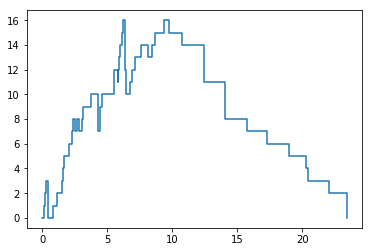

Tiempo de simulación: 23.39521557190771
Tiempo de servicio despues del cierre: 13.395215571907709
Tiempo medio del sistema: 6.156077805443113
Tiempo medio de la cola: 5.441878248836007

Máximo número de clientes en el sistema: 16


In [6]:
plt.plot(times, clients)
plt.show()

print("Tiempo de simulación: {}".format(time))
print("Tiempo de servicio despues del cierre: {}".format(simulation_time_after_last_client))
print("Tiempo medio del sistema: {}".format(mean_system_time))
print("Tiempo medio de la cola: {}".format(mean_queue_time))
print("\nMáximo número de clientes en el sistema: {}".format(max(clients)))